장진혁
jinhyuk2ya@gmail.com

# 데이터 수집

In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from selenium.webdriver.support.wait import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.keys import Keys
from selenium.common.exceptions import StaleElementReferenceException
from tqdm.notebook import tqdm
import time

In [2]:
options = webdriver.ChromeOptions()
prefs = {'download.default_directory' : '/home/jinhyuk3me/dev_ws/eda/data',
         'download.prompt_for_dwonload': False}
options.add_experimental_option('prefs', prefs)

url = "https://www.opinet.co.kr/searRgSelect.do"
driver = webdriver.Chrome(service=Service("/home/jinhyuk3me/dev_ws/eda/driver/chromedriver"), options=options)
driver.get(url)
driver.get(url)

---

In [3]:
sido = driver.find_element(By.ID, "SIDO_NM0")
sido_elements = sido.find_elements(By.TAG_NAME, "option")
sido_names = [sido_element.get_attribute('value') for sido_element in sido_elements]
sido_names = sido_names[1:]
print(sido_names)
sido.send_keys(sido_names[0])

['서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시', '세종특별자치시', '경기도', '강원특별자치도', '충청북도', '충청남도', '전북특별자치도', '전라남도', '경상북도', '경상남도', '제주특별자치도']


In [4]:
gu = driver.find_element(By.ID, "SIGUNGU_NM0")
gu_elements = gu.find_elements(By.TAG_NAME, "option")
gu_names = [gu_element.get_attribute('value') for gu_element in gu_elements]
gu_names = gu_names[1:]
print(gu_names)
gu.send_keys(gu_names[0])

['강남구', '강동구', '강북구', '강서구', '관악구', '광진구', '구로구', '금천구', '노원구', '도봉구', '동대문구', '동작구', '마포구', '서대문구', '서초구', '성동구', '성북구', '송파구', '양천구', '영등포구', '용산구', '은평구', '종로구', '중구', '중랑구']


---

In [5]:
data = []
prev_name = ""

class MySameNameError(Exception):
    pass

for idx, gu_name in tqdm(enumerate(gu_names), total=len(gu_names)):
    #--------------------------------------------------
    print("\n[",gu_name,"]\n")
    driver.implicitly_wait(3)
    gu = driver.find_element(By.ID, "SIGUNGU_NM0")
    gu.send_keys(gu_name)
    WebDriverWait(driver, timeout=30).until(EC.visibility_of_element_located((By.CLASS_NAME, "tab_type2")))
    driver.refresh()
    print("-------------------------------------")
    while(True):
        try:
            button_panel = WebDriverWait(driver, timeout=30).until(EC.visibility_of_element_located((By.CLASS_NAME, "tab_type2")))
            button = button_panel.find_element(By.ID, """os_layer2""")
            button.click()
            station_count = driver.find_element(By.CLASS_NAME, "tc_spot").get_attribute("innerText")
            print(gu_name,"의 예상 주유소 수는 ", station_count,"개 입니다.")
            primitive_stations = driver.find_element(By.ID, "body1").find_elements(By.TAG_NAME, "tr")
            stations = [primitive_station.find_element(By.TAG_NAME, "a") for primitive_station in primitive_stations]
            print(gu_name, "의 실제 주유소 수는 ", len(stations), "개 입니다")
            break
        except StaleElementReferenceException :
            continue
    print("-------------------------------------")
    count = 0
    for station in stations :
        station.click()
        #------------------------------------------------------------------------
        while(True):
            try:
                WebDriverWait(driver, timeout=30).until(EC.visibility_of_element_located((By.ID, "os_nm")))
                station_name = driver.find_element(By.ID, "os_nm").get_attribute('innerText')
                if(station_name == prev_name):
                    raise MySameNameError
                else :
                    count = count+1
                    prev_name = station_name
                    print("[주유소 이름] ", station_name,"(",count,"""/""",len(stations),")") 
                    # 예시: 대성석유(주) 마곡대성주유소 ( 20 / 33 )
                break
            except StaleElementReferenceException :
                continue
            except MySameNameError : 
                # 새로운 상세 팝업이 열리지 않은채로 정보를 읽는 경우
                continue
        #------------------------------------------------------------------------
        print("- 고급휘발유 가격: ", end="")
        while(True):
            try:
                print(driver.find_element(By.ID, "b034_p").get_attribute('innerText'))
                primium_price = driver.find_element(By.ID, "b034_p").get_attribute('innerText')
                break
            except StaleElementReferenceException :
                continue
        #------------------------------------------------------------------------
        print("- 보통휘발유 가격: ", end="")
        while(True):
            try:
                print(driver.find_element(By.ID, "b027_p").get_attribute('innerText'))
                regular_price = driver.find_element(By.ID, "b027_p").get_attribute('innerText')
                break
            except StaleElementReferenceException :
                continue
        #------------------------------------------------------------------------
        print("- 경유 가격: ", end="")
        while(True):
            try:
                print(driver.find_element(By.ID, "d047_p").get_attribute('innerText'))
                diesel_price = driver.find_element(By.ID, "d047_p").get_attribute('innerText')
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 실내등유 가격: ", end="")
        while(True):
            try:
                print(driver.find_element(By.ID, "c004_p").get_attribute('innerText'))
                indoor_price = driver.find_element(By.ID, "c004_p").get_attribute('innerText')
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 전화번호: ", end="")
        while(True):
            try:
                print(driver.find_element(By.ID, "phn_no").get_attribute('innerText'))
                phone_number = driver.find_element(By.ID, "phn_no").get_attribute('innerText')
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 주소: ", end="")
        while(True):
            try:
                print(driver.find_element(By.ID, "rd_addr").get_attribute('innerText'))
                address = driver.find_element(By.ID, "rd_addr").get_attribute('innerText')
                break;
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 상호명: ", end="")
        while(True):
            try:
                print(driver.find_element(By.ID, "poll_div_nm").get_attribute('innerText'))
                brand = driver.find_element(By.ID, "poll_div_nm").get_attribute('innerText')
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 세차장: ", end="")
        while(True):
            try:
                if (driver.find_element(By.ID, "cwsh_yn").get_attribute('src') 
                   == "https://www.opinet.co.kr/images/user/gis/oil_station_service1_01.gif"):
                    car_wash = True
                    print(car_wash)
                else :
                    car_wash = False
                    print(car_wash)
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 충전소: ", end="")
        while(True):
            try:
                if (driver.find_element(By.ID, "lpg_yn").get_attribute('src') 
                   == "https://www.opinet.co.kr/images/user/gis/oil_station_service1_02_01_off.gif"):
                    gas = False
                    print(gas)
                else :
                    gas = True
                    print(gas)
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 경정비: ", end="")
        while(True):
            try:
                if (driver.find_element(By.ID, "maint_yn").get_attribute('src') 
                   == "https://www.opinet.co.kr/images/user/gis/oil_station_service1_03.gif"):
                    maintenance = True
                    print(maintenance)
                else :
                    maintenance = False
                    print(maintenance)
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 편의점: ", end="")
        while(True):
            try:
                if (driver.find_element(By.ID, "cvs_yn").get_attribute('src') 
                   == "https://www.opinet.co.kr/images/user/gis/oil_station_service1_04_off.gif"):
                    cvs = False
                    print(cvs)
                else :
                    cvs = True
                    print(cvs)
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        print("- 24시: ", end="")
        while(True):
            try:
                if (driver.find_element(By.ID, "sel24_yn").get_attribute('src') 
                   == "https://www.opinet.co.kr/images/user/gis/oil_station_service1_05.gif"):
                    sel24 = True
                    print(sel24)
                else :
                    sel24 = False
                    print(sel24)
                break
            except StaleElementReferenceException :
                continue
        #---------------------------------------------------------------------
        data.append((station_name, primium_price, regular_price, diesel_price, 
                     indoor_price, phone_number, address, brand, car_wash, gas, maintenance, cvs, sel24))
        print("-------------------------------------------------------")

len(data)
        
        

  0%|          | 0/25 [00:00<?, ?it/s]


[ 강남구 ]

-------------------------------------
강남구 의 예상 주유소 수는  30 개 입니다.
강남구 의 실제 주유소 수는  30 개 입니다
-------------------------------------
[주유소 이름]  오일프러스 셀프 ( 1 / 30 )
- 고급휘발유 가격: 1,899
- 보통휘발유 가격: 1,719
- 경유 가격: 1,638
- 실내등유 가격: 
- 전화번호: 02-3462-5100
- 주소: 서울 강남구 남부순환로 2651 (도곡동)
- 상호명: SK에너지
- 세차장: True
- 충전소: False
- 경정비: True
- 편의점: False
- 24시: True
-------------------------------------------------------
[주유소 이름]  지에스칼텍스㈜ 은마주유소 ( 2 / 30 )
- 고급휘발유 가격: 1,919
- 보통휘발유 가격: 1,719
- 경유 가격: 1,699
- 실내등유 가격: 
- 전화번호: 02-3452-1882
- 주소: 서울 강남구 영동대로 235
- 상호명: GS칼텍스
- 세차장: True
- 충전소: False
- 경정비: True
- 편의점: False
- 24시: False
-------------------------------------------------------
[주유소 이름]  HD현대오일뱅크㈜직영 강남셀프주유소 ( 3 / 30 )
- 고급휘발유 가격: 1,899
- 보통휘발유 가격: 1,719
- 경유 가격: 1,638
- 실내등유 가격: 
- 전화번호: 02-3462-0018
- 주소: 서울 강남구 도곡로 208
- 상호명: HD현대오일뱅크
- 세차장: True
- 충전소: False
- 경정비: False
- 편의점: False
- 24시: False
-------------------------------------------------------
[주유소 이름]  (주)보성 세곡주유소 ( 4 / 30 

421

---

# 데이터 전처리

In [6]:
import pandas as pd
df = pd.DataFrame(data, columns=[
    '주유소명', '고급휘발유 가격', '보통휘발유 가격', '경유 가격', '실내 등유 가격', '전화번호', '주소', '상호명',
    '세차장', '충전소', '경정비', '편의점', '24시영업'
    ])

In [7]:
df

,주유소명,고급휘발유 가격,보통휘발유 가격,경유 가격,실내 등유 가격,전화번호,주소,상호명,세차장,충전소,경정비,편의점,24시영업
0,오일프러스 셀프,"1,899","1,719","1,638",,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,True,False,True,False,True
1,지에스칼텍스㈜ 은마주유소,"1,919","1,719","1,699",,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,True,False,True,False,False
2,HD현대오일뱅크㈜직영 강남셀프주유소,"1,899","1,719","1,638",,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,True,False,False,False,False
3,(주)보성 세곡주유소,"1,928","1,728","1,589",,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,True,False,False,False,False
4,방죽주유소,,"1,737","1,609",,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
416,(주)태영 구도일주유소 한인,"1,877","1,687","1,567",,02-438-5151,서울 중랑구 망우로 170,S-OIL,True,False,True,False,False
417,범아주유소,,"1,729","1,569","1,600",02-974-8356,서울 중랑구 동일로 881,S-OIL,True,False,True,False,False
418,신내주유소,,"1,739","1,598","1,500",02-2207-0523,서울 중랑구 용마산로 705 (신내동),SK에너지,True,False,False,False,False
419,용마로주유소,,"1,758","1,658","1,600",02-439-3037,서울 중랑구 용마산로 309 (면목동),SK에너지,True,False,False,False,False


In [8]:
df.to_csv('/home/jinhyuk3me/dev_ws/eda/data/opinet_data/opinet.csv')

---

가격 column의 value들은 전부 숫자여야 함

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   주유소명      421 non-null    object
 1   고급휘발유 가격  421 non-null    object
 2   보통휘발유 가격  421 non-null    object
 3   경유 가격     421 non-null    object
 4   실내 등유 가격  421 non-null    object
 5   전화번호      421 non-null    object
 6   주소        421 non-null    object
 7   상호명       421 non-null    object
 8   세차장       421 non-null    bool  
 9   충전소       421 non-null    bool  
 10  경정비       421 non-null    bool  
 11  편의점       421 non-null    bool  
 12  24시영업     421 non-null    bool  
dtypes: bool(5), object(8)
memory usage: 28.5+ KB


가격들이 전부 string이군요

In [10]:
import numpy as np

df['고급휘발유 가격'] = pd.to_numeric(df['고급휘발유 가격'].str.replace(",",''))
df['보통휘발유 가격'] = pd.to_numeric(df['보통휘발유 가격'].str.replace(",",''))
df['경유 가격'] = pd.to_numeric(df['경유 가격'].str.replace(",",''))
df['실내 등유 가격'] = pd.to_numeric(df['실내 등유 가격'].str.replace(",",''))

In [11]:
df.head()

,주유소명,고급휘발유 가격,보통휘발유 가격,경유 가격,실내 등유 가격,전화번호,주소,상호명,세차장,충전소,경정비,편의점,24시영업
0,오일프러스 셀프,1899.0,1719,1638,NaN,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,True,False,True,False,True
1,지에스칼텍스㈜ 은마주유소,1919.0,1719,1699,NaN,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,True,False,True,False,False
2,HD현대오일뱅크㈜직영 강남셀프주유소,1899.0,1719,1638,NaN,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,True,False,False,False,False
3,(주)보성 세곡주유소,1928.0,1728,1589,NaN,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,True,False,False,False,False
4,방죽주유소,NaN,1737,1609,NaN,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,True,False,False,False,False


잘 바뀌었으니 저장하겠습니다

In [12]:
df.to_csv('/home/jinhyuk3me/dev_ws/eda/data/opinet_data/opinet2.csv')

---

# 데이터 분석 및 시각화

In [13]:
import pandas as pd

df = pd.read_csv("/home/jinhyuk3me/dev_ws/eda/data/opinet_data/opinet2.csv", index_col=0)

### 지역별 분석

In [14]:
df['구'] = [addr.split(' ')[1] for addr in df['주소']]
df.head()

,주유소명,고급휘발유 가격,보통휘발유 가격,경유 가격,실내 등유 가격,전화번호,주소,상호명,세차장,충전소,경정비,편의점,24시영업,구
0,오일프러스 셀프,1899.0,1719,1638,NaN,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,True,False,True,False,True,강남구
1,지에스칼텍스㈜ 은마주유소,1919.0,1719,1699,NaN,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,True,False,True,False,False,강남구
2,HD현대오일뱅크㈜직영 강남셀프주유소,1899.0,1719,1638,NaN,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,True,False,False,False,False,강남구
3,(주)보성 세곡주유소,1928.0,1728,1589,NaN,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,True,False,False,False,False,강남구
4,방죽주유소,NaN,1737,1609,NaN,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,True,False,False,False,False,강남구


지역별 비교는 평균치로 해야 할 것 같습니다

In [15]:
import numpy as np

pivot_table1 = df.pivot_table(index='구', values=[
    '고급휘발유 가격', '보통휘발유 가격', '경유 가격', '실내 등유 가격'
    ], aggfunc=np.mean)
pivot_table2 = df.pivot_table(index='구', values=[
    '세차장', '충전소', '경정비', '편의점', '24시영업',
    ], aggfunc=np.mean)

/tmp/ipykernel_8072/2999622559.py:3: FutureWarning: The provided callable <function mean at 0x795fab7c35b0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table1 = df.pivot_table(index='구', values=[
/tmp/ipykernel_8072/2999622559.py:6: FutureWarning: The provided callable <function mean at 0x795fab7c35b0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pivot_table2 = df.pivot_table(index='구', values=[


---

구별 가격 평균 정보는 pivot_table1에

In [16]:
pivot_table1.head()

,경유 가격,고급휘발유 가격,보통휘발유 가격,실내 등유 가격
구,,,,
강남구,1830.733333,2176.000000,1945.833333,1741.500000
강동구,1662.769231,1959.625000,1788.230769,1599.750000
강북구,1534.600000,1849.000000,1671.200000,1440.000000
강서구,1574.454545,1906.125000,1704.818182,1534.142857
관악구,1621.928571,1967.833333,1749.357143,1411.400000


구별 부가 서비스 평균 정보는 pivot_table2에

True=1, False=0으로 놓으면 해당 서비스를 제공하는 station의 비율을 알 수 있을 것이다

In [17]:
pivot_table2.head()

,24시영업,경정비,세차장,충전소,편의점
구,,,,,
강남구,0.366667,0.300000,0.900000,0.000000,0.000000
강동구,0.076923,0.384615,0.923077,0.000000,0.076923
강북구,0.100000,0.100000,0.600000,0.000000,0.100000
강서구,0.272727,0.303030,0.787879,0.060606,0.242424
관악구,0.142857,0.214286,0.714286,0.000000,0.071429


---

가격 정보 분석

지역별 보통휘발유 가격 분석

In [18]:
import folium
import json

geo_path = "/home/jinhyuk3me/dev_ws/eda/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='OpenStreetMap')
setting = folium.Choropleth(
    geo_data=geo_str,
    data=pivot_table1,
    columns=[pivot_table1.index, '보통휘발유 가격'],
    key_on="feature.properties.name",
    fill_color="PuRd"
)
setting.add_to(map)
map

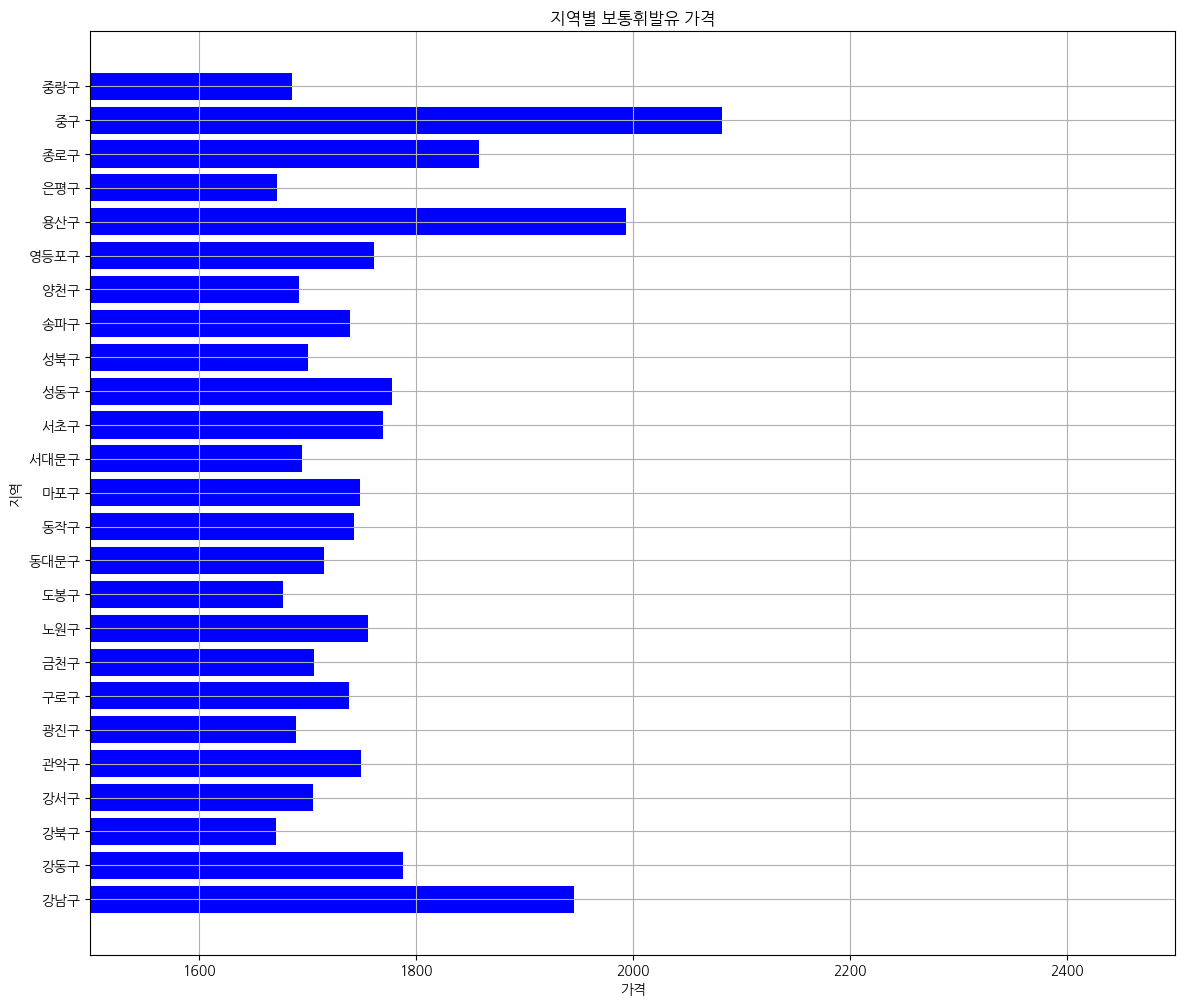

In [19]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(14,12))
plt.barh(pivot_table2.index, pivot_table1['보통휘발유 가격'], color='blue')
plt.title('지역별 보통휘발유 가격')
plt.xlabel('가격')
plt.ylabel('지역')
plt.xlim(1500, 2500)
plt.grid()
plt.show()

지역별 고급휘발유 가격

In [20]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='OpenStreetMap')
setting = folium.Choropleth(
    geo_data=geo_str,
    data=pivot_table1,
    columns=[pivot_table1.index, '고급휘발유 가격'],
    key_on="feature.properties.name",
    fill_color="PuRd"
)
setting.add_to(map)
map

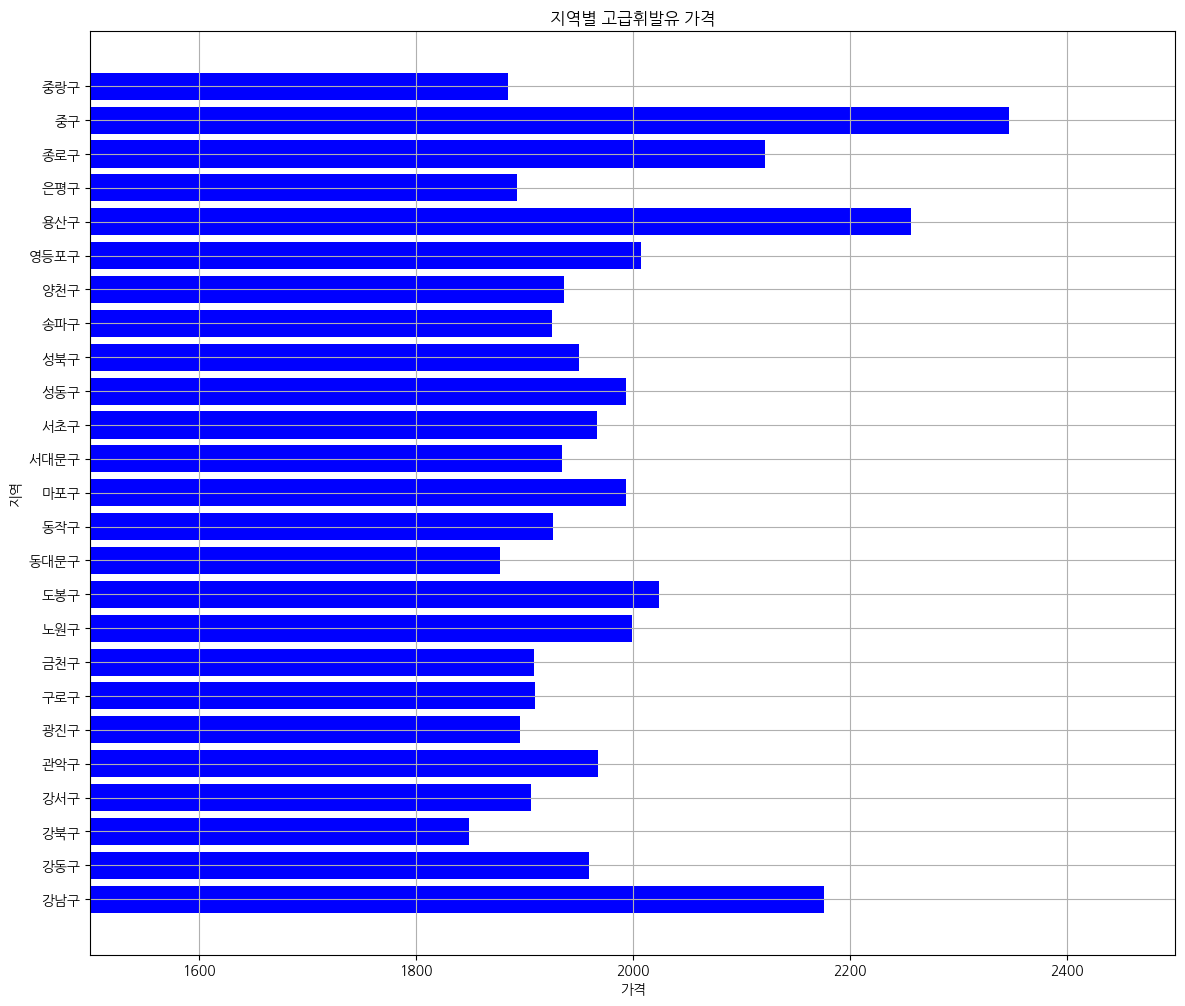

In [21]:
plt.figure(figsize=(14,12))
plt.barh(pivot_table2.index, pivot_table1['고급휘발유 가격'], color='blue')
plt.title('지역별 고급휘발유 가격')
plt.xlabel('가격')
plt.ylabel('지역')
plt.xlim(1500, 2500)
plt.grid()
plt.show()

지역별 경유 가격

In [22]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='OpenStreetMap')
setting = folium.Choropleth(
    geo_data=geo_str,
    data=pivot_table1,
    columns=[pivot_table1.index, '경유 가격'],
    key_on="feature.properties.name",
    fill_color="PuRd"
)
setting.add_to(map)
map

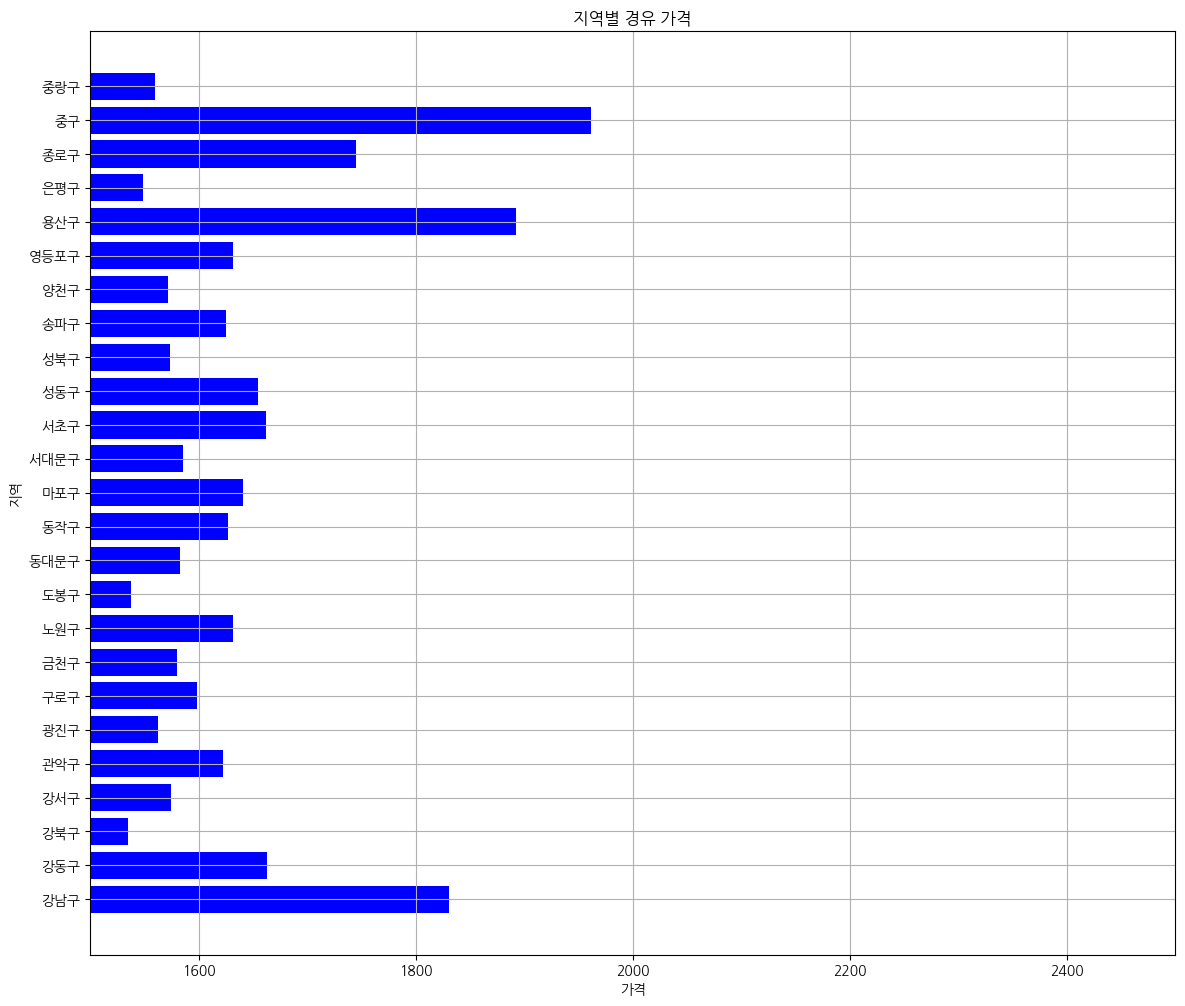

In [23]:
plt.figure(figsize=(14,12))
plt.barh(pivot_table2.index, pivot_table1['경유 가격'], color='blue')
plt.title('지역별 경유 가격')
plt.xlabel('가격')
plt.ylabel('지역')
plt.xlim(1500, 2500)
plt.grid()
plt.show()

지역별 등유 가격

In [24]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='OpenStreetMap')
setting = folium.Choropleth(
    geo_data=geo_str,
    data=pivot_table1,
    columns=[pivot_table1.index, '실내 등유 가격'],
    key_on="feature.properties.name",
    fill_color="PuRd"
)
setting.add_to(map)
map

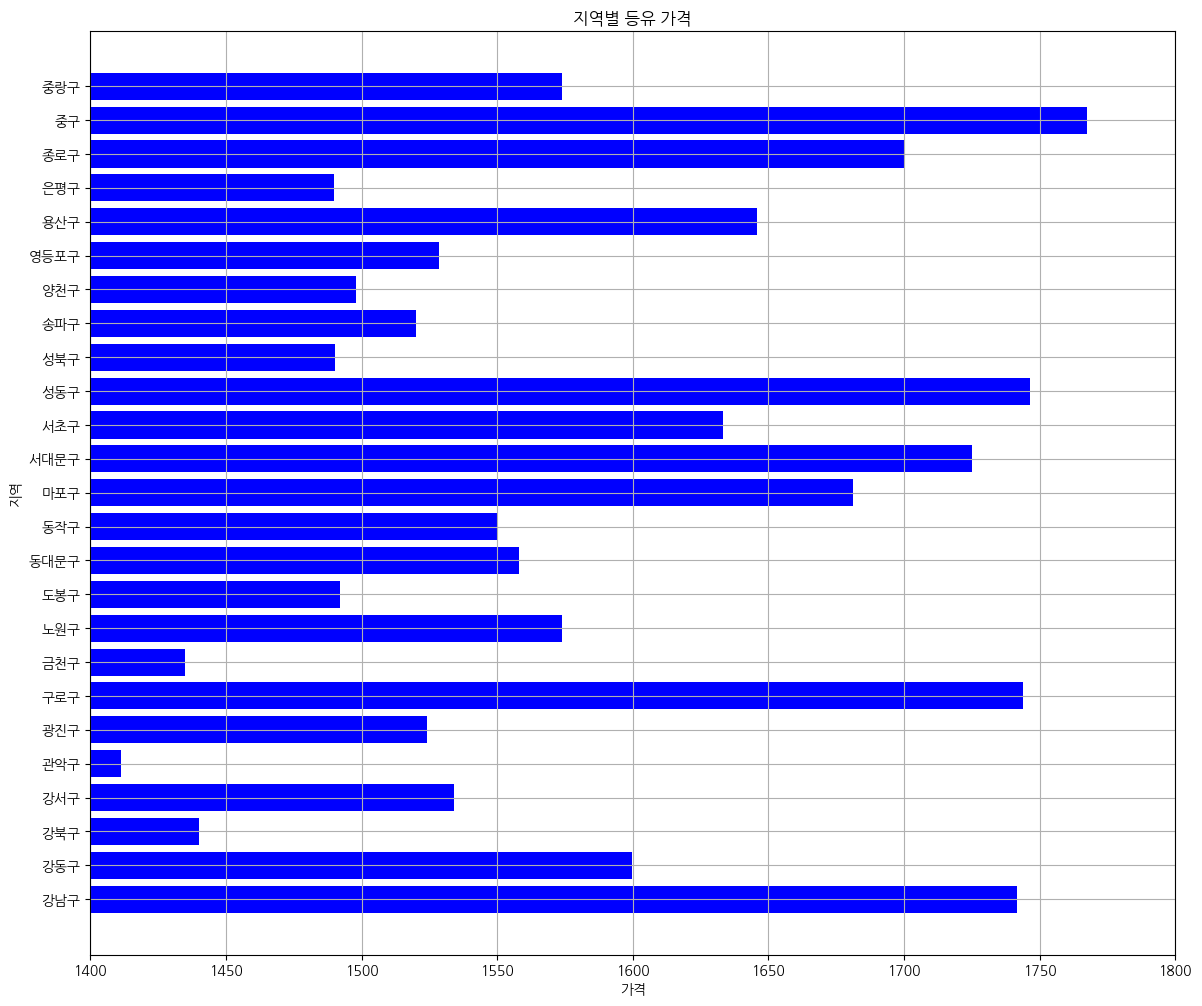

In [25]:
plt.figure(figsize=(14,12))
plt.barh(pivot_table2.index, pivot_table1['실내 등유 가격'], color='blue')
plt.title('지역별 등유 가격')
plt.xlabel('가격')
plt.ylabel('지역')
plt.xlim(1400, 1800)
plt.grid()
plt.show()

---

부가서비스 정보 분석

24시간 영업 정보

In [26]:
import folium
import json

geo_path = "/home/jinhyuk3me/dev_ws/eda/data/02. skorea_municipalities_geo_simple.json"
geo_str = json.load(open(geo_path, encoding='utf-8'))

map = folium.Map(location=[37.5502, 126.982], zoom_start=10.5, tiles='OpenStreetMap')
setting = folium.Choropleth(
    geo_data=geo_str,
    data=pivot_table2,
    columns=[pivot_table2.index, '24시영업'],
    key_on="feature.properties.name",
    fill_color="PuRd"
)
setting.add_to(map)
map

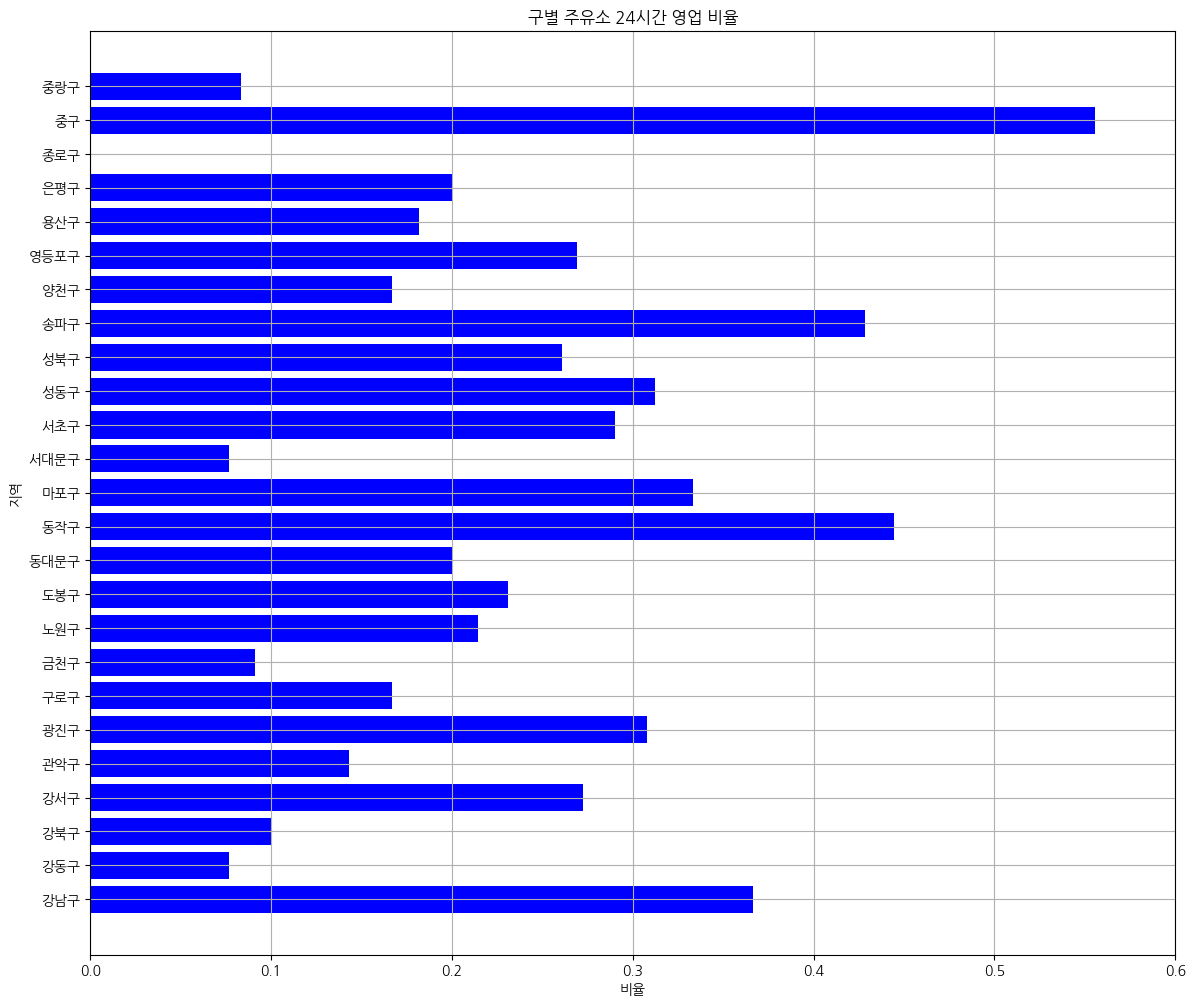

In [27]:
import matplotlib.pyplot as plt
import koreanize_matplotlib

plt.figure(figsize=(14,12))
plt.barh(pivot_table2.index, pivot_table2['24시영업'], color='blue')
plt.title('구별 주유소 24시간 영업 비율')
plt.xlim(0,0.6)
plt.xlabel('비율')
plt.ylabel('지역')
plt.grid()
plt.show()

---

편의점 영업 정보

In [28]:
setting = folium.Choropleth(
    geo_data=geo_str,
    data=pivot_table2,
    columns=[pivot_table2.index, '편의점'],
    key_on="feature.properties.name",
    fill_color="PuRd"
)
setting.add_to(map)
map

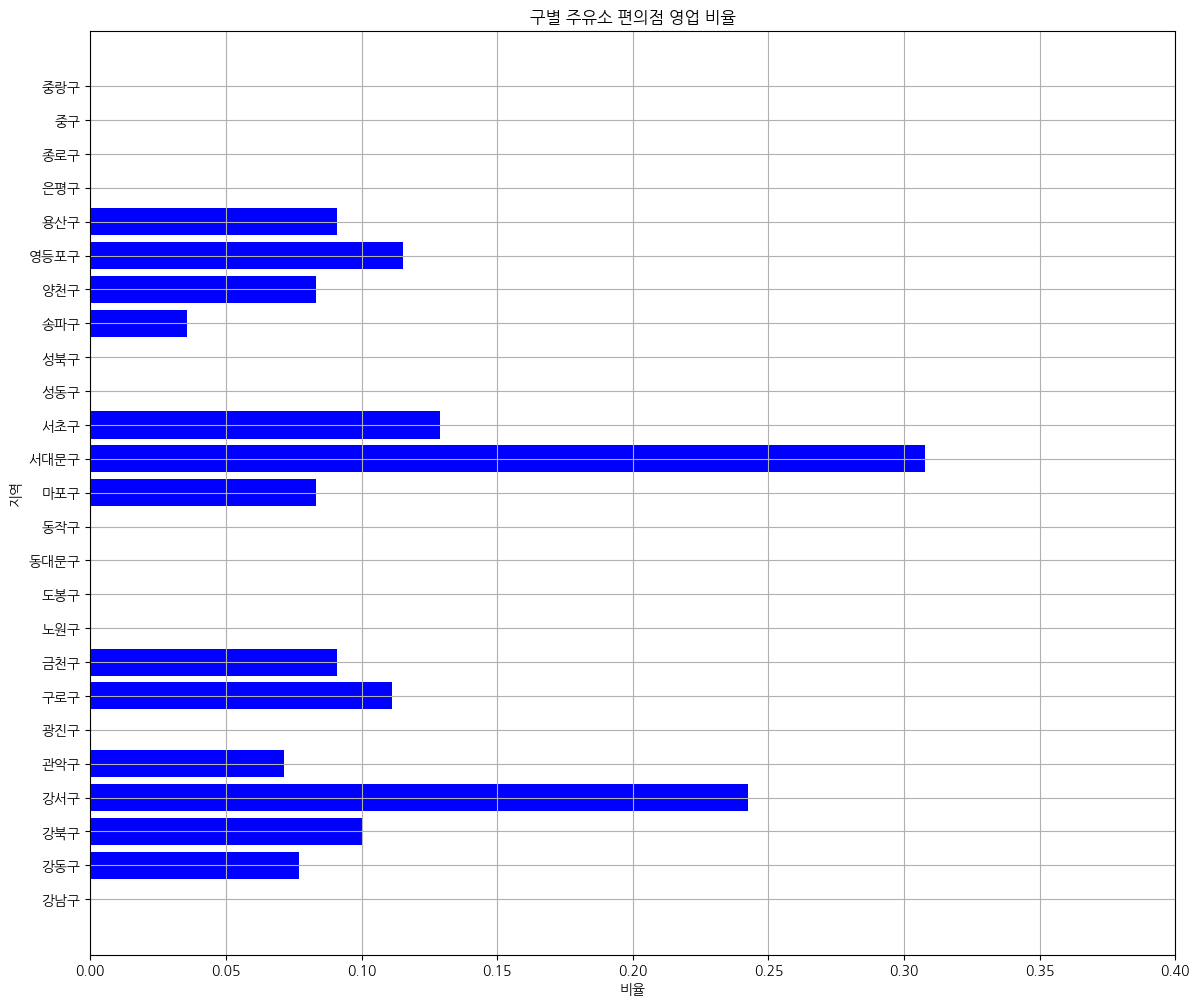

In [29]:
plt.figure(figsize=(14,12))
plt.barh(pivot_table2.index, pivot_table2['편의점'], color='blue')
plt.title('구별 주유소 편의점 영업 비율')
plt.xlim(0,0.4)
plt.xlabel('비율')
plt.ylabel('지역')
plt.grid()
plt.show()

---

## 각 지점별 분석

서울에서 가장 비싼/싼 주유소 상위 20개

In [ ]:
import googlemaps

gmaps_key = "*************************"
gmaps = googlemaps.Client(key=gmaps_key)

In [33]:
lat_list = []
lng_list = []   

for idx, row in tqdm(df.iterrows(), total=len(df.index)):
    geocode = gmaps.geocode(row["주소"])
    lat = geocode[0].get("geometry")["location"]["lat"] if len(geocode) > 0 else np.nan
    lng = geocode[0].get("geometry")["location"]["lng"] if len(geocode) > 0 else np.nan
    lat_list.append(lat)
    lng_list.append(lng)
    
df['위도'] = lat_list
df['경도'] = lng_list

df.head()

  0%|          | 0/422 [00:00<?, ?it/s]

,주유소명,고급휘발유 가격,보통휘발유 가격,경유 가격,실내 등유 가격,전화번호,주소,상호명,세차장,충전소,경정비,편의점,24시영업,구,위도,경도
0,HD현대오일뱅크㈜직영 강남셀프주유소,1899.0,1719,1638,NaN,02-3462-0018,서울 강남구 도곡로 208,HD현대오일뱅크,True,False,False,False,False,강남구,37.492295,127.041860
1,HD현대오일뱅크㈜직영 강남셀프주유소,1899.0,1719,1699,NaN,02-3452-1882,서울 강남구 영동대로 235,GS칼텍스,True,False,True,False,False,강남구,37.500072,127.067285
2,(주)보성 세곡주유소,1928.0,1728,1589,NaN,02-445-6870,서울 강남구 헌릉로 731 (세곡동),SK에너지,True,False,False,False,False,강남구,37.467157,127.118708
3,(주)보성 세곡주유소,1928.0,1737,1609,NaN,02-459-3434,서울 강남구 밤고개로 215 (율현동),GS칼텍스,True,False,False,False,False,강남구,37.474993,127.106887
4,오일프러스 셀프,1899.0,1739,1638,NaN,02-3462-5100,서울 강남구 남부순환로 2651 (도곡동),SK에너지,True,False,True,False,True,강남구,37.485839,127.039672


---

백업

In [34]:
df.to_csv('/home/jinhyuk3me/dev_ws/eda/data/opinet_data/opinet3.csv')

In [35]:
df = pd.read_csv("/home/jinhyuk3me/dev_ws/eda/data/opinet_data/opinet3.csv", index_col=0)

---

duplicated 검사를 해보니 실제 중복된건 아니고 그냥 너무 붙어있어서 반올림했을 때 우연히 같게 계산되는듯

In [36]:
df[df.duplicated(subset=['위도', '경도'])]

,주유소명,고급휘발유 가격,보통휘발유 가격,경유 가격,실내 등유 가격,전화번호,주소,상호명,세차장,충전소,경정비,편의점,24시영업,구,위도,경도
80,HD현대오일뱅크㈜직영 가양주유소,1955.0,1759,1619,NaN,02-3661-9470,서울 강서구 양천로 391 (가양동),HD현대오일뱅크,True,False,False,False,False,강서구,37.567880,126.851079
108,서울중앙고속주유소,1799.0,1675,1545,NaN,02-463-2231,서울 광진구 동일로 345 (중곡동),SK에너지,False,False,False,False,False,광진구,37.563544,127.088830
109,정해네트웍스(주)일진주유소,1824.0,1675,1545,NaN,02-461-5152,서울 광진구 동일로 413 (중곡동),S-OIL,True,False,False,False,True,광진구,37.563544,127.088830


In [37]:
df[df['위도']==37.563544]

,주유소명,고급휘발유 가격,보통휘발유 가격,경유 가격,실내 등유 가격,전화번호,주소,상호명,세차장,충전소,경정비,편의점,24시영업,구,위도,경도


In [38]:
df[df['위도'].round(6)==37.563544]

,주유소명,고급휘발유 가격,보통휘발유 가격,경유 가격,실내 등유 가격,전화번호,주소,상호명,세차장,충전소,경정비,편의점,24시영업,구,위도,경도
102,(주)자연에너지 중원주유소,NaN,1645,1517,NaN,02-498-8683,서울 광진구 동일로 398 (중곡동),HD현대오일뱅크,True,False,False,False,False,광진구,37.563544,127.08883
108,서울중앙고속주유소,1799.0,1675,1545,NaN,02-463-2231,서울 광진구 동일로 345 (중곡동),SK에너지,False,False,False,False,False,광진구,37.563544,127.08883
109,정해네트웍스(주)일진주유소,1824.0,1675,1545,NaN,02-461-5152,서울 광진구 동일로 413 (중곡동),S-OIL,True,False,False,False,True,광진구,37.563544,127.08883


---

In [41]:
df_desc = df[['주유소명','보통휘발유 가격','위도','경도']].sort_values(by='보통휘발유 가격', ascending=False)[:20]
df_asc = df[['주유소명','보통휘발유 가격','위도','경도']].sort_values(by='보통휘발유 가격', ascending=True)[:20]

In [42]:
df_desc

,주유소명,보통휘발유 가격,위도,경도
377,서계주유소,2971,37.552329,126.968946
409,서남주유소,2756,37.558375,126.972094
29,(주)만정에너지 삼보주유소,2620,37.511521,127.047172
28,(주)제이제이네트웍스 제이제이주유소,2548,37.517647,127.035735
408,필동주유소,2539,37.560912,126.993713
27,SK논현주유소,2435,37.518637,127.028238
26,(주)소모 쎈트럴주유소,2388,37.501421,127.059141
400,(주)대양씨앤씨 사직주유소,2375,37.574505,126.966607
376,한석주유소,2310,37.521390,126.965557
264,(주)옥수하이웨이스테이션,2298,37.541024,127.011368


In [43]:
df_asc

,주유소명,보통휘발유 가격,위도,경도
249,(주)서울에너지 직영,1605,37.564261,127.055685
250,㈜성동에너지,1605,37.561430,127.062327
169,(주)자연에너지 국민주유소,1635,37.572965,127.065037
54,이케이에너지(주) 강서주유소,1638,37.549163,126.846996
316,현대주유소,1638,37.533873,126.829262
53,화곡역주유소,1638,37.540719,126.841530
410,우림주유소,1643,37.592332,127.099105
265,㈜원천주유소,1643,37.614895,127.052732
317,신월주유소,1644,37.520061,126.844080
267,신방주유소,1645,37.585556,127.031846


서울에서 보통휘발유 값이 제일 비싼 주유소 상위 20개

In [44]:
mapping = folium.Map(location=[df_desc['위도'].iloc[0], df_desc['경도'].iloc[0]], zoom_start=12)
for idx, row in df_desc.iterrows():
    if row['위도'] == np.nan or row['경도'] == np.nan:
        continue
    else:
        folium.Marker([row['위도'], row['경도']], popup=row['주유소명']).add_to(mapping) 
mapping

서울에서 보통 휘발유 값이 제일 싼 상위 20개

In [45]:
mapping = folium.Map(location=[df_asc['위도'].iloc[0], df_asc['경도'].iloc[0]], zoom_start=12)
for idx, row in df_asc.iterrows():
    if row['위도'] == np.nan or row['경도'] == np.nan:
        continue
    else:
        folium.Marker([row['위도'], row['경도']], popup=row['주유소명']).add_to(mapping) 
mapping

---

편의점이 있는 주유소들도 골라서 지도에 찍어보기

In [46]:
df_cvs = df[df['편의점']==True]
df_cvs = df_cvs[['주유소명','편의점','위도','경도']]

In [47]:
df_cvs

,주유소명,편의점,위도,경도
37,(주)삼표에너지 고덕주유소,True,37.555049,127.129793
49,SK에너지(주) 매일주유소,True,37.622798,127.019136
55,행촌에너지 공항주유소,True,37.574611,126.802303
60,뉴신정주유소,True,37.531580,126.856052
62,㈜한경에너지 신화곡주유소,True,37.527258,126.842890
66,스카이주유소,True,37.571486,126.804381
67,KH에너지㈜직영 가양주유소,True,37.569782,126.841902
68,KH에너지㈜직영 KH외발산주유소,True,37.543421,126.816863
72,대성석유(주)방화대성주유소,True,37.572882,126.823482
82,박물관주유소,True,37.565785,126.845122


In [48]:
mapping = folium.Map(location=[df_cvs['위도'].iloc[3], df_cvs['경도'].iloc[3]], zoom_start=11)
for idx, row in df_cvs.iterrows():
    if row['위도'] == np.nan or row['경도'] == np.nan:
        continue
    else:
        folium.Marker([row['위도'], row['경도']], popup=row['주유소명']).add_to(mapping) 
mapping

---

보통휘발유 가격, 고급휘발유 가격, 경유 가격, 등유 가격 상관관계

In [49]:
price_table = df[['주유소명','보통휘발유 가격','고급휘발유 가격', '경유 가격', '실내 등유 가격']].set_index('주유소명')

In [50]:
price_table

,보통휘발유 가격,고급휘발유 가격,경유 가격,실내 등유 가격
주유소명,,,,
HD현대오일뱅크㈜직영 강남셀프주유소,1719,1899.0,1638,NaN
HD현대오일뱅크㈜직영 강남셀프주유소,1719,1899.0,1699,NaN
(주)보성 세곡주유소,1728,1928.0,1589,NaN
(주)보성 세곡주유소,1737,1928.0,1609,NaN
오일프러스 셀프,1739,1899.0,1638,NaN
...,...,...,...,...
(주)태영 구도일주유소 한인,1687,1877.0,1567,NaN
범아주유소,1729,NaN,1589,1600.0
신내주유소,1739,NaN,1598,1500.0


보통휘발유와 다른 유종의 가격들 사이에는 강한 상관관계가 있다.

In [51]:
price_table.corr()

,보통휘발유 가격,고급휘발유 가격,경유 가격,실내 등유 가격
보통휘발유 가격,1.000000,0.959803,0.987753,0.759051
고급휘발유 가격,0.959803,1.000000,0.952841,0.835318
경유 가격,0.987753,0.952841,1.000000,0.778096
실내 등유 가격,0.759051,0.835318,0.778096,1.000000


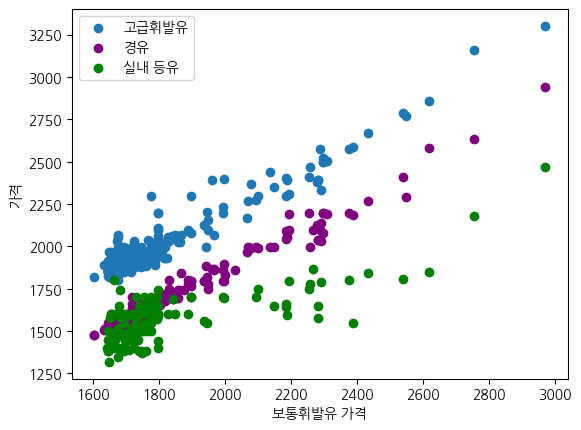

In [58]:
plt.scatter(x=price_table['보통휘발유 가격'], y=price_table['고급휘발유 가격'], label="고급휘발유")
plt.scatter(x=price_table['보통휘발유 가격'], y=price_table['경유 가격'], color='purple', label='경유')
plt.scatter(x=price_table['보통휘발유 가격'], y=price_table['실내 등유 가격'], color='green', label='실내 등유')
plt.xlabel("보통휘발유 가격")
plt.ylabel('가격')
plt.legend()
plt.show()